In [1]:
from shapely.geometry import Point, MultiPoint, Polygon, MultiPolygon

import geopandas as gpd
import matplotlib.pyplot as plt

import geoplot
import numpy as np

import pandas as pd
import json    
import pprint   
pp = pprint.PrettyPrinter()

<font size="4">__Initial Analysis of flood data__

# Problem statement 1: Do hydrological events, like flood, occur more often over time in urban Taiwan? </font>

In [2]:
df_flood = gpd.read_file('NCDR_W84_FloodPoint_2018.shp', encoding='utf-8')  # load flood data

df_flood['nYear'] = df_flood['nYear'].astype(int) + 1911  # transfer Taiwanese calendar to AD

df_flood.loc[df_flood['CityName'] == '臺北市'].head()  # identify floods in Taipei City

,RecDate,EventName,CityName,TownName,Location,DataSource,nCityName,nCity,nTownName,nTown,nVillName,nVill,nTWD97_X,nTWD97_Y,nWGS84_Lon,nWGS84_Lat,Grid500,nYear,nEven,geometry
44,2013,TRAMI,臺北市,士林區,臺北市士林區福林里,EMIS-NCDR,臺北市,63000,士林區,63000110,福林里,63000110003,303157.00,2775537.00,121.526987,25.087176,121.525_25.085,2013,102潭美颱風,POINT (121.5269874514098 25.0871756031716)
45,2013,TRAMI,臺北市,士林區,臺北市士林區三玉里,"EMIS-NCDR,WRAEMIS",臺北市,63000,士林區,63000110,三玉里,63000110033,304062.00,2778933.00,121.536093,25.117802,121.535_25.115,2013,102潭美颱風,POINT (121.5360927642697 25.11780208559782)
47,2013,TRAMI,臺北市,松山區,臺北市松山區安平里,"EMIS-NCDR,WRAEMIS",臺北市,63000,松山區,63000010,安平里,63000010019,307394.72,2771630.75,121.568835,25.051755,121.570_25.050,2013,102潭美颱風,POINT (121.5688348343601 25.05175541138317)
48,2013,TRAMI,臺北市,士林區,臺北市士林區福中里,EMIS-NCDR,臺北市,63000,士林區,63000110,福中里,63000110009,301896.50,2775461.25,121.514489,25.086536,121.515_25.085,2013,102潭美颱風,POINT (121.5144886592243 25.0865355916443)
49,2013,TRAMI,臺北市,士林區,臺北市士林區天祿里,EMIS-NCDR,臺北市,63000,士林區,63000110,天祿里,63000110037,303249.03,2778530.75,121.528016,25.114200,121.525_25.115,2013,102潭美颱風,POINT (121.5280158261695 25.11419956156055)


[]

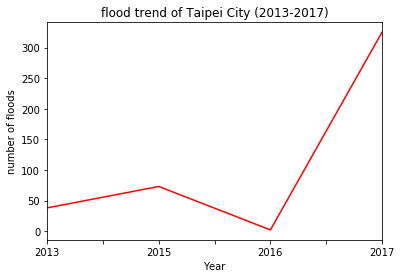

In [3]:
flood = df_flood.loc[df_flood['CityName'] == '臺北市'] # create new variable 'flood' to represent taipei city floods

frequency = flood['Location'].groupby(flood['nYear'].astype(str)).count().plot(c='r') # plot floods by year 
frequency.set_title('flood trend of Taipei City (2013-2017)')
frequency.set_xlabel('Year')
frequency.set_ylabel('number of floods')

plt.plot()

<font size = "4"> __Upload Taipei City Map__<font>


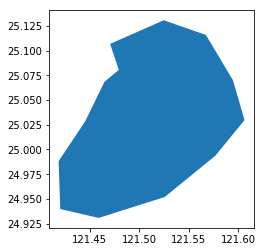

In [4]:
df_taiwan = gpd.read_file('TWN_adm2.shp')  # upload city map from DivaGis
df_taiwan  # find ID of Taipei City: ID_1 == 3
df_taiwan.loc[df_taiwan['ID_1'] ==3].plot() # I might need more precise map as this data contain no town boundaries...

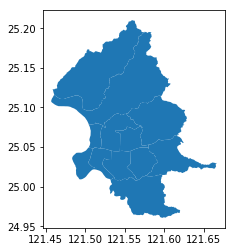

In [5]:
df_taiwan = gpd.read_file('TOWN_MOI_1081121.shp', encoding='utf-8')  # upload city map from another source

df_taiwan # find ID of Taipei City: COUNTYNAME == '臺北市'
taipei = df_taiwan.loc[df_taiwan['COUNTYNAME'] == '臺北市']

df_taiwan.loc[df_taiwan['COUNTYNAME'] == '臺北市'].plot() # Plot Taipei City again. 

# wow, comparing with this, the previous one doesn't even "look like" the same place, so weird!


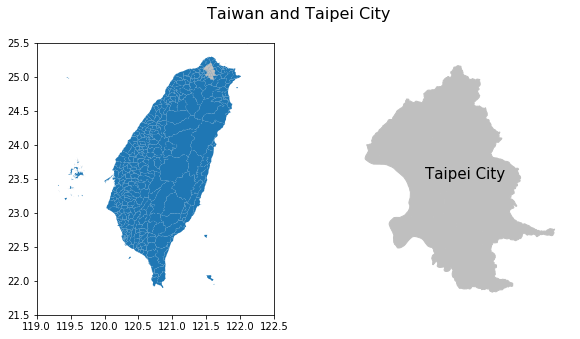

In [38]:
# Map Taiwan and Taipei City in subplots and save it as .png 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5) )

# axes[0]: indexing the boundary to make Taiwan center and bigger
xlim = (119, 122.5)
ylim = (21.5, 25.5)

axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)

df_taiwan.plot(axes = axes[0])
taipei.plot(axes = axes[0], color = '0.75')

# axes[1]: plot taipei city, use geoplot to make the plot look simpler 
geoplot.polyplot(taipei, ax=axes[1], color = '0.75')
axes[1].text(0.7, 0.5, 'Taipei City', 
        transform=axes[1].transAxes, ha="right", fontsize = 15)

fig.suptitle('Taiwan and Taipei City', fontsize=16)
plt.plot()

plt.savefig('Taiwan_and_Taipei.png')

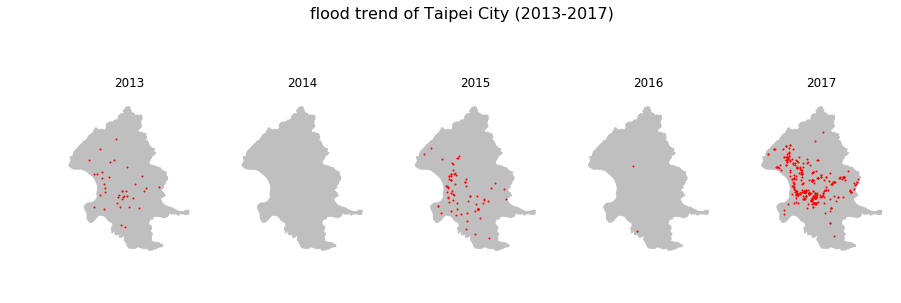

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(15, 5) )

for i in range(5): 
    geoplot.polyplot(taipei, ax=axes[i], color = '0.75')
    flood.loc[flood['nYear'] == 2013+i].plot(axes=axes[i], markersize = 1, c = 'r')
    axes[i].set_title(2013+i)

fig.suptitle('flood trend of Taipei City (2013-2017)', fontsize=16)
plt.xlabel('longitude', x = -2)
axes[0].set_ylabel('latitude')
plt.plot()

plt.savefig('flood_trend.png')

<font size = '4'> __Work on the housing data__<font>

In [8]:
# load the house data that I have preliminarily cleaned in Excel (changed Taiwan year to AD, filtered out non-housing data, 
# filtered out transactions of parking spaces and industrial plants and deleted some irrelevant columns) 
housing_data = pd.read_excel('houseprice_2012_2018.xlsx')
housing_data.head()

,Column1,Column2,Column3,Column32,Column4,Column5,Column6,Column7,Column8,Column9,Column92,Column10,Column11,Column12,Column13,Column16,Column17,Column18
0,The villages and towns urban district,land sector position building sector house num...,land shifting total area square meter,transaction_date,transaction year month and day,transaction pen number,shifting level,total floor number,building state,main use,construction_date,construction to complete the years,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,total price NTD,price_per_sqm,serial number
1,大安區,台北市大安區和平東路三段1巷72弄1~30號,19.39,20120629,1010629,土地1建物2車位0,五層,十七層,住宅大樓(11層含以上有電梯),國民住宅,19850522,0740522,100.97999999999999,3,2,18680000,184999,RPQNMLSJQHHFFFA08CA
2,內湖區,台北市內湖區民權東路六段90巷6弄1~30號,32.41,20120710,1010710,土地1建物1車位0,三層,五層,公寓(5樓含以下無電梯),住家用,19801114,0691114,104.11,3,1,14000000,134473,RPPPMLPKQHHFFCA67CA
3,松山區,台北市松山區三民路68巷1~30號,35.53,20120717,1010717,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),國民住宅,19920303,0810303,146.66,3,2,25800000,175917,RPOQMLPJKHIFFDA27DA
4,士林區,台北市士林區承德路四段10巷1~30號,31.2,20120720,1010720,土地1建物1車位0,一層,五層,公寓(5樓含以下無電梯),住家用,19790828,0680828,105.04,2,1,19000000,180883,RPSOMLPJRHHFFEA18DA


In [9]:
housing_data['Column2'].describe()

# Describe() shows that among all entries, more than 5000 addresses are not unique - indicate that there are multiple 
# house transactions happening among the years around the same places - a good sign for further analysis!

count               11588
unique               6485
top       臺北市北投區泉源路31~60號
freq                   50
Name: Column2, dtype: object

In [10]:
# To identify house price change, we need to have at least two house transcations of the same place over the period.
# Therefore, I first search for addresses that have appeared at least twice in the file. 

# define empty array
multi_record_address = []  # addresses that have appeared more than once in the dataframe
single_record_address = [] # addressese that have appeared ONLY once in the dataframe


# loop through all rows
address_counter = {}
for i in range(len(housing_data)):
    address = housing_data['Column2'][i]
    if address not in address_counter:
        address_counter[address] = 0
    address_counter[address] += 1

for k, v in address_counter.items():
    if v > 1:
        multi_record_address.append(k)
    else:
        single_record_address.append(k)

        
print("%i multiple addresses" % len(multi_record_address)) 
print("%i single record addresses found" % len(single_record_address))



2500 multiple addresses
3985 single record addresses found


In [43]:
# all the house transactions of which the address appear more than once in the dataframe: 
housing_data_clean = housing_data[~housing_data.Column2.isin(single_record_address)]
len(housing_data_clean)
housing_data_clean.head()

,Column1,Column2,Column3,Column32,Column4,Column5,Column6,Column7,Column8,Column9,Column92,Column10,Column11,Column12,Column13,Column16,Column17,Column18
3,松山區,台北市松山區三民路68巷1~30號,35.53,20120717,1010717,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),國民住宅,19920303,0810303,146.66,3,2,25800000,175917,RPOQMLPJKHIFFDA27DA
6,中山區,台北市中山區吉林路361~390號,6.31,20120727,1010727,土地1建物1車位0,六層,七層,套房(1房1廳1衛),住家用,19791219,0681219,38.56,1,0,4050000,105030,RPPNMLQJQHHFFCA47CA
11,中正區,台北市中正區中華路二段75巷1弄1~30號,21.34,20120725,1010725,土地2建物1車位0,一層，平台,七層,華廈(10層含以下有電梯),住家用,19760713,0650713,130.62,0,0,23080000,176696,RPQNMLKKQHHFFAA86CA
16,士林區,台北市士林區中山北路七段190巷4弄1~30號,16.01,20120716,1010716,土地2建物1車位0,六層,七層,華廈(10層含以下有電梯),住家用,19770804,0660804,77.72,2,2,13300000,171127,RPOPMLPKQHHFFEA87DA
22,中山區,台北市中山區合江街188巷1~30號,18.98,20120711,1010711,土地1建物1車位0,二層,七層,華廈(10層含以下有電梯),住家用,19771231,0661231,110.01,3,2,18700000,169984,RPWOMLKLQHHFFCA87CA


In [12]:
import requests  # library for accessing content from web URLs

In [45]:
# Goal: convert address to lat, lon using Google Api Geocoding
# Step 1: construct a dictionary with address as its key and url as its value

api_url_dict = {}
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json?address='
params = {'key': 'xxxxxxx'}  # delete key before upload 

for address in multi_record_address:
    url = requests.Request('GET', endpoint + address, params = params).prepare().url
    api_url_dict[address] = url

# print(api_url_dict)

{'台北市松山區三民路68巷1~30號': 'https://maps.googleapis.com/maps/api/geocode/json?address=%E5%8F%B0%E5%8C%97%E5%B8%82%E6%9D%BE%E5%B1%B1%E5%8D%80%E4%B8%89%E6%B0%91%E8%B7%AF68%E5%B7%B71~30%E8%99%9F&key=xxxxxxx', '台北市中山區吉林路361~390號': 'https://maps.googleapis.com/maps/api/geocode/json?address=%E5%8F%B0%E5%8C%97%E5%B8%82%E4%B8%AD%E5%B1%B1%E5%8D%80%E5%90%89%E6%9E%97%E8%B7%AF361~390%E8%99%9F&key=xxxxxxx', '台北市中正區中華路二段75巷1弄1~30號': 'https://maps.googleapis.com/maps/api/geocode/json?address=%E5%8F%B0%E5%8C%97%E5%B8%82%E4%B8%AD%E6%AD%A3%E5%8D%80%E4%B8%AD%E8%8F%AF%E8%B7%AF%E4%BA%8C%E6%AE%B575%E5%B7%B71%E5%BC%841~30%E8%99%9F&key=xxxxxxx', '台北市士林區中山北路七段190巷4弄1~30號': 'https://maps.googleapis.com/maps/api/geocode/json?address=%E5%8F%B0%E5%8C%97%E5%B8%82%E5%A3%AB%E6%9E%97%E5%8D%80%E4%B8%AD%E5%B1%B1%E5%8C%97%E8%B7%AF%E4%B8%83%E6%AE%B5190%E5%B7%B74%E5%BC%841~30%E8%99%9F&key=xxxxxxx', '台北市中山區合江街188巷1~30號': 'https://maps.googleapis.com/maps/api/geocode/json?address=%E5%8F%B0%E5%8C%97%E5%B8%82%E4%B8%AD%E5%B1%B1%E5%8

In [ ]:
# Step 2: construct a dictionary with address as its key and lon, lat as its value

coordinate_dict = {}


for address in multi_record_address:
    if address not in coordinate_dict:
            #response = requests.get(api_url_dict[address], verify=False)
            results = response.text

        data = json.loads(results)
        coordinate_dict[address] = (data['results'][0]['formatted_address'], data['results'][0]['geometry']['location'])

#with open ('coordinate_dict.txt', 'w') as outfile:
 #   json.dump(coordinate_dict, outfile)


In [14]:
# load the coordinate dictionary
with open ('coordinate_dict.txt', encoding='utf8') as json_file:
    coordinate_dict = json.load(json_file)

len(coordinate_dict)

2500

In [19]:
# Convert the coordinate dictionary to a DataFrame
coordinate_df = pd.DataFrame.from_dict(coordinate_dict, orient='index')

# Reset the index of dataframe and rename the merging column to match the column name in the orignal data
coordinate_df = coordinate_df.reset_index()
coordinate_df = coordinate_df.rename(columns={"index": "Column2", 0: "English address", 1: "Lat/Lng"})

# Creat lat, lon columns using the 'Lat/Lng' column from the dictionary 
for index, row in coordinate_df.iterrows():
    coordinate_df.loc[index, 'Lat'] = float(row['Lat/Lng']['lat'])
    coordinate_df.loc[index, 'Lng'] = float(row['Lat/Lng']['lng'])

coordinate_df = coordinate_df.drop(['Lat/Lng'], axis=1)
coordinate_df.head()

# merge the lon, lat data with the cleaned house transaction data
housing_df = housing_data_clean.merge(coordinate_df, on = "Column2")

# rename some important columns 
housing_df = housing_df.rename(columns={'Column32': 'transaction_date','Column92': 'construction_date', 
                                        'Column3': 'transaction_sqm', 'Column16': 'total_transaction_price',
                                       'Column17': 'price_per_sqm'})

    
housing_df.head()



,Column1,Column2,transaction_sqm,transaction_date,Column4,Column5,Column6,Column7,Column8,Column9,...,Column10,Column11,Column12,Column13,total_transaction_price,price_per_sqm,Column18,English address,Lat,Lng
0,松山區,台北市松山區三民路68巷1~30號,35.53,20120717,1010717,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),國民住宅,...,0810303,146.66,3,2,25800000,175917,RPOQMLPJKHIFFDA27DA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851
1,松山區,台北市松山區三民路68巷1~30號,31.05,20120711,1010711,土地1建物1車位0,三層,七層,華廈(10層含以下有電梯),國民住宅,...,0810303,128.44,3,2,21580000,168013,RPPOMLTKRHHFFDA18CA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851
2,松山區,台北市松山區三民路68巷1~30號,30.79,20120731,1010731,土地1建物1車位0,五層,七層,華廈(10層含以下有電梯),國民住宅,...,0810303,128.39,3,2,24000000,186925,RPXNMLLMIIHFFDA47CA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851
3,中山區,台北市中山區吉林路361~390號,6.31,20120727,1010727,土地1建物1車位0,六層,七層,套房(1房1廳1衛),住家用,...,0681219,38.56,1,0,4050000,105030,RPPNMLQJQHHFFCA47CA,"No. 361, Jilin Road, Zhongshan District, Taipe...",25.064912,121.530491
4,中山區,台北市中山區吉林路361~390號,7.78,20120911,1010911,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),住家用,...,0681219,45.54,2,1,7500000,164688,RPSRMLNJIIHFFCA27DA,"No. 361, Jilin Road, Zhongshan District, Taipe...",25.064912,121.530491


In [20]:
# Convert the pandas DataFrame to a GeoDataFrame
gdf_housing = gpd.GeoDataFrame(housing_df, geometry=[Point(xy) for xy in zip(housing_df['Lng'], housing_df['Lat'])])
gdf_housing.head()

,Column1,Column2,transaction_sqm,transaction_date,Column4,Column5,Column6,Column7,Column8,Column9,...,Column11,Column12,Column13,total_transaction_price,price_per_sqm,Column18,English address,Lat,Lng,geometry
0,松山區,台北市松山區三民路68巷1~30號,35.53,20120717,1010717,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),國民住宅,...,146.66,3,2,25800000,175917,RPOQMLPJKHIFFDA27DA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851,POINT (121.5638505 25.055213)
1,松山區,台北市松山區三民路68巷1~30號,31.05,20120711,1010711,土地1建物1車位0,三層,七層,華廈(10層含以下有電梯),國民住宅,...,128.44,3,2,21580000,168013,RPPOMLTKRHHFFDA18CA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851,POINT (121.5638505 25.055213)
2,松山區,台北市松山區三民路68巷1~30號,30.79,20120731,1010731,土地1建物1車位0,五層,七層,華廈(10層含以下有電梯),國民住宅,...,128.39,3,2,24000000,186925,RPXNMLLMIIHFFDA47CA,"Lane 68, Sanmin Road, Songshan District, Taipe...",25.055213,121.563851,POINT (121.5638505 25.055213)
3,中山區,台北市中山區吉林路361~390號,6.31,20120727,1010727,土地1建物1車位0,六層,七層,套房(1房1廳1衛),住家用,...,38.56,1,0,4050000,105030,RPPNMLQJQHHFFCA47CA,"No. 361, Jilin Road, Zhongshan District, Taipe...",25.064912,121.530491,POINT (121.5304908 25.0649123)
4,中山區,台北市中山區吉林路361~390號,7.78,20120911,1010911,土地1建物1車位0,七層,七層,華廈(10層含以下有電梯),住家用,...,45.54,2,1,7500000,164688,RPSRMLNJIIHFFCA27DA,"No. 361, Jilin Road, Zhongshan District, Taipe...",25.064912,121.530491,POINT (121.5304908 25.0649123)


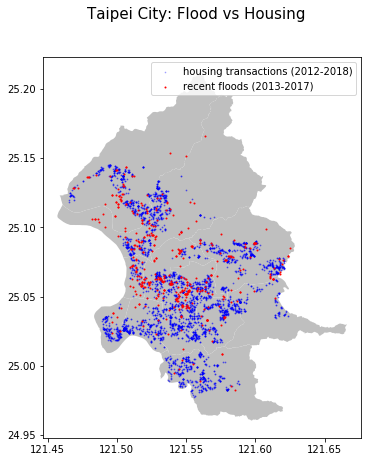

In [41]:
fig, axes = plt.subplots(figsize=(7, 7) )

taipei.plot(axes = axes,  color = '0.75')
#geoplot.polyplot(taipei, ax=axes, color = '0.75')
gdf_housing.plot(axes=axes, markersize = 0.5, c = 'b', alpha = 0.3, label = 'housing transactions (2012-2018)')
flood.plot(axes=axes, markersize = 1, c = 'r', label = 'recent floods (2013-2017)')


fig.suptitle('Taipei City: Flood vs Housing', fontsize=15)
axes.legend()
plt.plot()

plt.savefig('Taiwan_and_Taipei.png')
